In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/Akshat/Downloads/binary.csv')

In [3]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
X=data[['gre','gpa','rank']]
Y=data[['admit']]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [10]:
import xgboost as xgb

In [11]:
from xgboost.sklearn import XGBClassifier

In [25]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [13]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
#modelfit(xgb1, train, predictors)

In [70]:
dtrain = xgb.DMatrix(X_train.values, label=y_train)
dtest = xgb.DMatrix(X_test.values)

In [16]:
m=xgb1.fit(X_train,y_train)

C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akshat\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
dtest.feature_names

['f0', 'f1', 'f2']

In [59]:
dtest=xgb.DMatrix(X_test)

In [18]:
pred=m.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,classification_report

In [22]:
print(classification_report(pred,y_test,labels=[0,1]))

             precision    recall  f1-score   support

          0       0.87      0.74      0.80        62
          1       0.41      0.61      0.49        18

avg / total       0.76      0.71      0.73        80



In [33]:
y_train=np.array(y_train)
y_train=y_train.reshape(320,)
y_train=y_train.astype('int')

In [51]:
cv_params = {'max_depth': np.arange(3,12,2), 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation
optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 3,  5,  7,  9, 11]), 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [52]:
optimized_GBM.grid_scores_

[mean: 0.70000, std: 0.04677, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.70625, std: 0.04780, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.66875, std: 0.05173, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.68125, std: 0.05813, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.68750, std: 0.05413, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.66250, std: 0.05467, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.68125, std: 0.05097, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.69063, std: 0.04980, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.65938, std: 0.05449, params: {'max_depth': 7, 'min_child_weight': 5},
 mean: 0.68750, std: 0.05229, params: {'max_depth': 9, 'min_child_weight': 1},
 mean: 0.68750, std: 0.05929, params: {'max_depth': 9, 'min_child_weight': 3},
 mean: 0.65938, std: 0.05449, params: {'max_depth': 9, 'min_child_weight': 5},
 mean: 0.68437, std: 0.05449, params: {'max_depth': 

In [36]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 3}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation
optimized_GBM.fit(X_train, y_train)
optimized_GBM.grid_scores_

[mean: 0.68125, std: 0.05376, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.70625, std: 0.04780, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.70312, std: 0.05413, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.70937, std: 0.02119, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.71875, std: 0.02795, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.71562, std: 0.04353, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [94]:
cv_params = {'gamma':[i/10.0 for i in range(0,5)]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 3,'learning_rate':0.01,'subsample':0.8}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation
optimized_GBM.fit(X_train, y_train)
optimized_GBM.grid_scores_

[mean: 0.71875, std: 0.02795, params: {'gamma': 0.0},
 mean: 0.72188, std: 0.02500, params: {'gamma': 0.1},
 mean: 0.71562, std: 0.02296, params: {'gamma': 0.2},
 mean: 0.71562, std: 0.02296, params: {'gamma': 0.3},
 mean: 0.71562, std: 0.02296, params: {'gamma': 0.4}]

In [96]:
#[i/10.0 for i in range(6,10)]
cv_params = {'colsample_bytree':[i/10.0 for i in range(3,10)]}
ind_params = {'n_estimators': 1000, 'seed':0, 'gamma':0.1, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 3,'learning_rate':0.01,'subsample':0.8}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation
optimized_GBM.fit(X_train, y_train)
optimized_GBM.grid_scores_

[mean: 0.69375, std: 0.04485, params: {'colsample_bytree': 0.3},
 mean: 0.69375, std: 0.04485, params: {'colsample_bytree': 0.4},
 mean: 0.69375, std: 0.04485, params: {'colsample_bytree': 0.5},
 mean: 0.69375, std: 0.04485, params: {'colsample_bytree': 0.6},
 mean: 0.72188, std: 0.02500, params: {'colsample_bytree': 0.7},
 mean: 0.72188, std: 0.02500, params: {'colsample_bytree': 0.8},
 mean: 0.72188, std: 0.02500, params: {'colsample_bytree': 0.9}]

In [97]:
our_params = {'eta': 0.01, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':3,'gamma':0.1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = dtrain, num_boost_round = 3000, nfold = 5,
                metrics = ['auc'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [98]:
cv_xgb

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.615764,0.030799,0.693257,0.013016
1,0.603759,0.049796,0.726469,0.006656
2,0.617045,0.057101,0.752060,0.010804
3,0.623488,0.042100,0.763715,0.012929
4,0.647434,0.042675,0.769281,0.014373
5,0.644989,0.037922,0.766662,0.015561
6,0.648866,0.037653,0.775085,0.009279
7,0.643818,0.040860,0.778768,0.005882
8,0.643458,0.039675,0.783019,0.006375
9,0.635271,0.034376,0.785928,0.007699


In [99]:
our_params = {'eta': 0.01, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':3,'gamma':0.1} 

final_gb = xgb.train(our_params, dtrain, num_boost_round = 20)

In [103]:
final_gb.best_iteration

19

In [65]:
dtest.feature_names

['gre', 'gpa', 'rank']

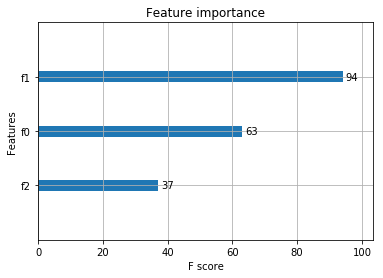

In [83]:
%matplotlib inline
xgb.plot_importance(final_gb)

In [106]:
d_test=xgb.DMatrix(X_test,y_test)

In [108]:
d_test.feature_names=['f0', 'f1', 'f2']

In [112]:
y_pred=final_gb.predict(d_test)

In [113]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0


In [114]:
print(accuracy_score(y_pred,y_test))

0.7125


In [1]:
text = open("C:/Users/Akshat/Desktop/SlangSD.txt", "rb").read()


In [3]:
t=text.split('r\na')

TypeError: a bytes-like object is required, not 'str'

In [9]:
t=str(text)

In [10]:
a=t.split('\\')

In [12]:
b=a[0:100]

In [13]:
c=[]
for i in b:
    d=i.replace('na-','')
    c.append(d)

In [112]:
[i for i in b i.replace('na-','')]

SyntaxError: invalid syntax (<ipython-input-112-f6a579e82fdc>, line 1)

In [22]:
import re

In [151]:
[w for w in c[40:60] if re.sub('na-','',w)]

['r',
 'face',
 't-1',
 'r',
 'gina',
 't1',
 'r',
 'hair',
 't-1',
 'r',
 'heavin',
 "'",
 't0',
 'r',
 'k shocker',
 't-1',
 'r',
 'o',
 't-1',
 'r']

In [27]:
c[40:60]

['r',
 '7',
 't0',
 'r',
 'b',
 't0',
 'r',
 'bloonie',
 't0',
 'r',
 'cup slut',
 't-1',
 'r',
 'face',
 't-1',
 'r',
 'gina',
 't1',
 'r',
 'hair']

In [103]:
# [w 
#  for w in c[40:60] 
#  if re.findall('(t(-|[0-9]))',w)
#  c[40:60].pop(w)
#  ]
x=[]
for w in z:
    if re.findall('t(-|[0-9])',w):
        z.remove(w)

    



['r',
 'face',
 'r',
 'gina',
 'r',
 'hair',
 'r',
 'heavin',
 "'",
 'r',
 'k shocker',
 'r',
 'o',
 'r']

In [72]:
re.findall('(t(-|[0-9]))')

TypeError: expected string or bytes-like object

In [132]:
[a.remove(w) for w in a if re.search('^na$',w)]

[None, None, None, None, None, None, None]

In [42]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [189]:
def clean(text):
    lis=[]
    text=str(text)
    text=text[0:300]
    #text = "".join([word for word in text if word not in string.punctuation])
    text=text.split('\\')
    for i in text:
        i=i.replace('na-','')
        i=i.replace('na ','')
        lis.append(i)
    [lis.remove(w) for w in lis if w in string.punctuation]
    [lis.remove(w) for w in lis if re.search('t(-|[0-9])',w)]
    [lis.remove(w) for w in lis if re.search('^[abcdefghijklmnopqrstuvwxyz]$',w)]
    [lis.remove(w) for w in lis if re.search('^na$',w)]
    [w.replace("'",'') for w in lis]
    [lis.remove(w) for w in lis if re.search('[0-9]',w)]
    [lis.remove(w) for w in lis if re.search('^[abcdefghijklmnopqrstuvwxyz]$',w)]
    #lis="".join([word for word in lis if word not in string.punctuation])
    return lis

In [175]:
a[0:300]

["b'a",
 "'",
 't-1',
 'r',
 "'f",
 't1',
 'r',
 "'ight",
 't-1',
 'r',
 "'nnesia",
 't-1',
 'r',
 "'pcha",
 't0',
 'r',
 "'s",
 't1',
 'r',
 "'shaa",
 't0',
 'r',
 "'zareah",
 't0',
 'r',
 'na-',
 't0',
 'r',
 'na-1',
 't-1',
 'r',
 'na-5',
 't-1',
 'r',
 'na-7',
 't0',
 'r',
 'na-b',
 't0',
 'r',
 'na-bloonie',
 't0',
 'r',
 'na-cup slut',
 't-1',
 'r',
 'na-face',
 't-1',
 'r',
 'na-gina',
 't1',
 'r',
 'na-hair',
 't-1',
 'r',
 'na-heavin',
 "'",
 't0',
 'r',
 'na-k shocker',
 't-1',
 'r',
 'na-o',
 't-1',
 'r',
 'na-phone',
 't-1',
 'r',
 'na-pooh-stics',
 't0',
 'r',
 'na-round',
 't0',
 'r',
 'na-squared',
 't0',
 'r',
 'na-status',
 't-1',
 'r',
 'na-stumpy',
 't0',
 'r',
 'na-textual',
 't0',
 'r',
 'na-town',
 't1',
 'r',
 'na-town altamont kansas',
 't-1',
 'r',
 'na-town crew',
 't0',
 'r',
 'na-towners',
 't-2',
 'r',
 'na-train bad',
 't-1',
 'r',
 'na "bitch"',
 't-1',
 'r',
 'na 10-4',
 't1',
 'r',
 'na 3 day',
 't0',
 'r',
 'na a',
 't-1',
 'r',
 'na b',
 't0',
 'r',
 

In [190]:
clean(text)

["b'a",
 "'f",
 "'ight",
 "'nnesia",
 "'pcha",
 "'s",
 "'shaa",
 "'zareah",
 '5',
 'bloonie',
 'cup slut',
 'face',
 'gina',
 'hair',
 'heavin',
 'k shocker',
 'phone']

In [169]:
[w for w in a[0:30] if re.sub('na-','',w)]

["b'a",
 "'",
 't-1',
 'r',
 "'f",
 't1',
 'r',
 "'ight",
 't-1',
 'r',
 "'nnesia",
 't-1',
 'r',
 "'pcha",
 't0',
 'r',
 "'s",
 't1',
 'r',
 "'shaa",
 't0',
 'r',
 "'zareah",
 't0',
 'r',
 't0',
 'r',
 'na-1',
 't-1']

In [33]:
from autocorrect import spell

In [38]:
print(spell('omg'))

org


In [191]:
from sklearn.decomposition import LatentDirichletAllocation

In [192]:
ld=LatentDirichletAllocation()

C:\Users\Akshat\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


FileNotFoundError: [Errno 2] No such file or directory: 'wiki_en_wordids.txt'